# 3. Aplicación de algoritmos de densidad

## Tarea 4.1: Realiza el pre-procesamiento necesario para poder aplicar algoritmos de densidad. 

Tomaremos el preprocesamiento que ya hemos realizado con anterioridad, pues también nos sirve para esto, pero añadiremos algun retoque. Este será la reducción de dimensionalidad por medio de algoritmos ya implementados como PCA (para este, tomaremos el 95% de la varianza explicada para no perder mucha información), pues con dimensiones grandes, los algoritmos de densidad no funcionan tan bien como desearíamos y la elección de parámetros como epsilon y el mínimo de puntos se dificulta en sobremanera cuando hay muchas dimensiones.

### Visualización del dataset

In [1]:
import pandas as pd
import numpy as numpy

df = pd.read_pickle("Accidentes_limpio.pkl")

In [2]:
df

,num_expediente,coordenada_x_utm,coordenada_y_utm,positiva_droga,hour,minuto,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,...,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S,mes,dia
0,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.557331,-1.315997
1,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.557331,-1.315997
2,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.210935,-0.059889
3,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.210935,-0.059889
4,2.698436,-0.550216,0.268400,0.0,-0.662771,0.789049,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.210935,0.282686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,1.584919,-0.174983,0.898062,0.0,0.552478,-1.225625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,0.282686
40161,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,-0.516656
40162,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,-0.516656
40163,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,-0.516656


### PCA

Retendremos el 95% de la varianza para no perder una gran cantidad de datos, tal y como ya hemos dicho anteriormente

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_pca = pca.fit_transform(df)


In [8]:
X_pca.shape

(40165, 47)

## Tarea 4.2: Establece el radio (eps) y número de puntos mínimo número más adecuado de clusters para el dataset proporcionado.

Esta tarea se dividirá en dos pasos:
- 1: Establecer el radio epsilon: Estudiaremos un gráfico de codo, el cual proviene del algoritmo KNN, ordenados los resultados de menor a mayor. Los resultados que tengan valores muy bajos nos dirán como de densamente poblado están los gráficos. Si la pendiente cambia, sabremos que la distancia entre puntos ha aumentando; por lo que tomaremos ese valor (aproximadamente) y ese será nuestro epsilon
- 2: Establecer el numero de puntos minimo mas adecuado: De el análisis y visualización realizados en el apartado 1, sabemos que hay 21 clusters, luego haremos un bucle que prediga los datos, el que más se acerque a este número será el más adecuado.

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

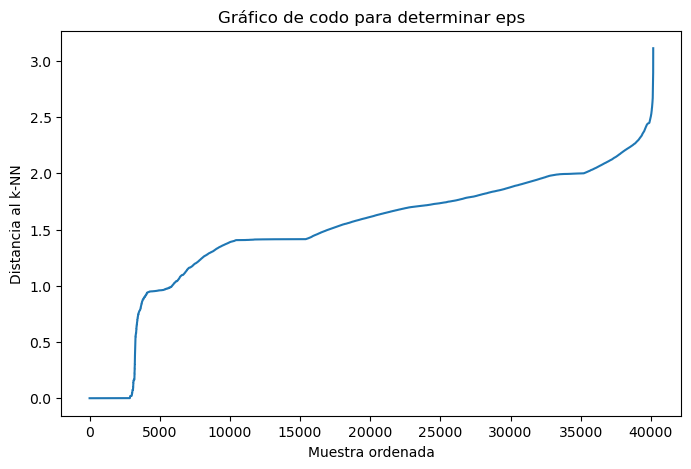

In [12]:
# Paso 1
k = 2
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Ordenar las distancias para el gráfico de codo
distances = np.sort(distances[:, k - 1])  # Obtener distancias al k-ésimo vecino
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Muestra ordenada")
plt.ylabel("Distancia al k-NN")
plt.title("Gráfico de codo para determinar eps")
plt.show()

Podemos observar que la pendiente empieza a cambiar algo más abajo de 1 y el cambio de pendiente se acentúa mucho tras este, tomemos un epsilon de 0.9, pues a partir de este rango los puntos están muy separados

Número de clusters encontrados para i=1: 37965
Número de clusters encontrados para i=2: 1700
Número de clusters encontrados para i=3: 316
Número de clusters encontrados para i=4: 95
Número de clusters encontrados para i=5: 41
Número de clusters encontrados para i=6: 21
Número de clusters encontrados para i=7: 9
Número de clusters encontrados para i=8: 7
Número de clusters encontrados para i=9: 4
Número de clusters encontrados para i=10: 2
Número de clusters encontrados para i=11: 1
Número de clusters encontrados para i=12: 1
Número de clusters encontrados para i=13: 1
Número de clusters encontrados para i=14: 1
Número de clusters encontrados para i=15: 0
Número de clusters encontrados para i=16: 0
Número de clusters encontrados para i=17: 0
Número de clusters encontrados para i=18: 0
Número de clusters encontrados para i=19: 0
Número de clusters encontrados para i=20: 0


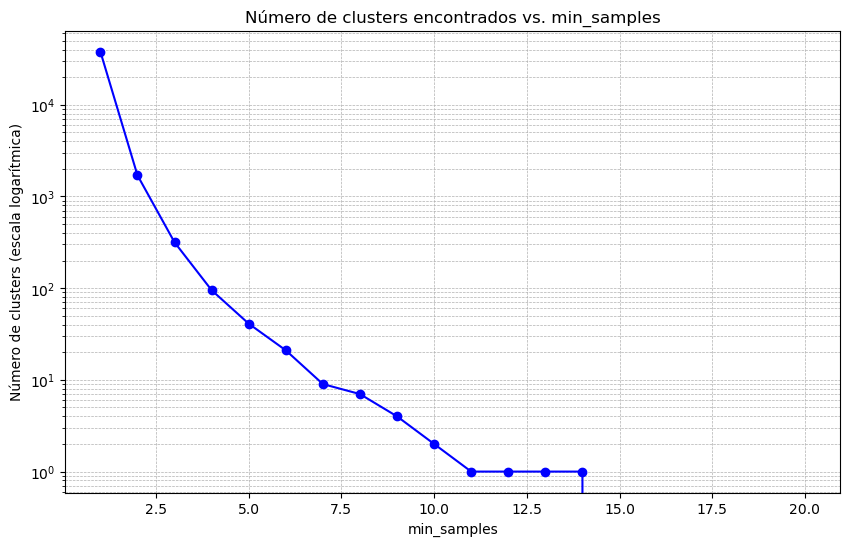

In [16]:
# Paso 2

import matplotlib.pyplot as plt

eps = 0.9
n_clusters_list = []

for i in range(1, 21):
    # Ajustamos el algoritmo
    dbscan = DBSCAN(eps=eps, min_samples=i)
    labels = dbscan.fit_predict(X_pca)
    
    # Evaluación de resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_list.append(n_clusters)
    print(f"Número de clusters encontrados para i={i}: {n_clusters}")

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), n_clusters_list, marker='o', linestyle='-', color='b')
plt.yscale('log')  # Escala logarítmica en el eje Y
plt.title("Número de clusters encontrados vs. min_samples")
plt.xlabel("min_samples")
plt.ylabel("Número de clusters (escala logarítmica)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Al parecer nuestra predicción está bastante acertada, con 6 muestras y le rango de 0.9; hemos obtenido 21 clusters, los cuales son justamente el número de distritos en los que se distribuía el problema; ya solo queda conocer, por medio de las métricas, cuan buena ha sido esta separación

## Tarea 4.3: ¿Cómo varía la calidad del clustering con diferentes valores de 'eps' y de minpoints?

Para afrontar esta tarea, veremos valores cercanos a los que ya hemos elegido y veremos como afecta esto al número de clusters. El método de evaluación será el mismo, vemos cuan cercano es el resultado al numero de clusters que buscamos.

In [20]:
eps_values = np.arange(0.5, 2.1, 0.5)  # De 0.5 a 2.0
min_samples_values = np.arange(3, 10, 1)  # De 3 a 19

for eps in eps_values:
    print("-------------------------------------------")
    for min in min_samples_values:
        # Ajustar DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min)
        labels = dbscan.fit_predict(X_pca)
        
        # Evaluación de resultados
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"Número de clusters encontrados para eps={eps} y min={min}: {n_clusters}")
print("-------------------------------------------")

-------------------------------------------
Número de clusters encontrados para eps=0.5 y min=3: 275
Número de clusters encontrados para eps=0.5 y min=4: 88
Número de clusters encontrados para eps=0.5 y min=5: 35
Número de clusters encontrados para eps=0.5 y min=6: 17
Número de clusters encontrados para eps=0.5 y min=7: 6
Número de clusters encontrados para eps=0.5 y min=8: 5
Número de clusters encontrados para eps=0.5 y min=9: 2
-------------------------------------------
Número de clusters encontrados para eps=1.0 y min=3: 525
Número de clusters encontrados para eps=1.0 y min=4: 148
Número de clusters encontrados para eps=1.0 y min=5: 65
Número de clusters encontrados para eps=1.0 y min=6: 28
Número de clusters encontrados para eps=1.0 y min=7: 13
Número de clusters encontrados para eps=1.0 y min=8: 9
Número de clusters encontrados para eps=1.0 y min=9: 6
-------------------------------------------
Número de clusters encontrados para eps=1.5 y min=3: 1893
Número de clusters encontrad

Basándonos en estos resultados y el gráfico de la tarea anterior, vemos que, para radios menores, salen menor número de clusters, esto se debe al comportamiento del algoritmo, al haber una distancia tan pequeña, muchos puntos pueden quedar fuera de cualquier cluster y que sean catalogados de ruido; mientras que con valores por encima de este,  el número de clusters aumenta, pues se pueden considerar parte de muchos más clusters. Por otro lado, si miramos min_samples; observamos que cuando este crece el número de clusters decrece, esto se debe a que obligamoms a que haya más puntos muy cercanos para poder clasificarlos como clusters, luego el número de datos tratados de ruido aumenta de forma muy rápida. También deberíamos decir que nuestra hipótesis acerca de los datos desperdigados es probablemente cierta, pues a más radio y menos puntos cercanos, el número de clusters se dispara de manera exponencial.

## Tarea 4.4 Utiliza por lo menos dos índices de calidad de clustering y analiza sus resultados.

Comenzaremos la tarea realizando el dbscans con los parámetros que ya hemos elegido. Utilizaremos métricas como el índice de silueta, para conocer como de bien está hecha la separación; y el de Davies-Bouldin, para medir como de compactos y separados están estos.

In [17]:
eps = 0.9
min = 6

In [18]:
# Aplicamos DBSCAN y eliminamos los puntos etiquetados como ruido
dbscan = DBSCAN(eps=eps, min_samples=min)
labels = dbscan.fit_predict(X_pca)

filtered_labels = labels[labels != -1]
X_filtered = X_pca[labels != -1]

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np

In [20]:
filtered_labels

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  8,  8,  8,  8,  8,  8,  8,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       10, 10, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 13, 13, 13, 13, 13,
       13, 11, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
       16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 18, 18, 18, 18],
      dtype=int64)

### Silueta

In [26]:
silhouette_avg = silhouette_score(X_filtered, filtered_labels)
print("Coeficiente de silueta:", silhouette_avg)

Coeficiente de silueta: 0.9372759082983064


Vemos que el índice medio de silueta está rozando el 94%; luego por cómo funciona esta métrica, podemos observar que los clústers son densos y separados. También hay que tener en cuenta que esto no es nada más que una media, deberíamos estudiarlos todos juntos para ver si existe mucha varianza en los clusters

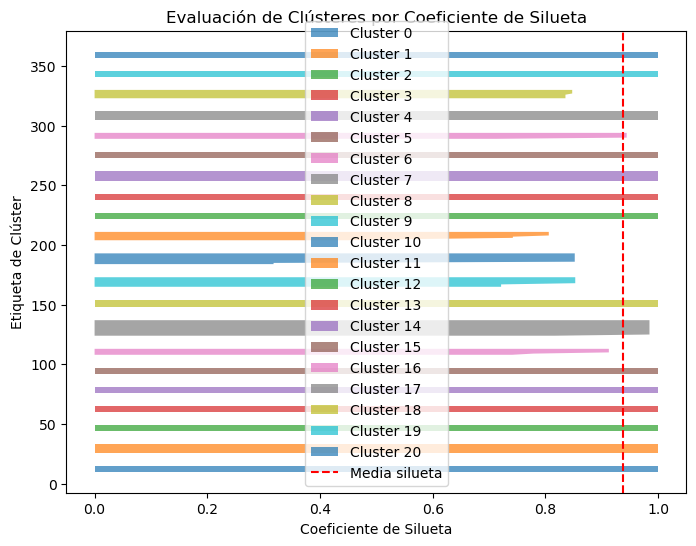

In [29]:
silhouette_vals = silhouette_samples(X_pca, labels)

# Número de clústeres (excluyendo ruido, que tiene etiqueta -1)
unique_clusters = np.unique(X_filtered)

# Crear gráfico de silueta
fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
for cluster in np.unique(filtered_labels):  # Usar las etiquetas filtradas
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {cluster}')
    y_lower = y_upper + 10  # Espacio entre clústeres

# Línea roja de referencia (media de silueta)
ax.axvline(silhouette_avg, color="red", linestyle="--", label="Media silueta")

# Etiquetas y título
ax.set_title("Evaluación de Clústeres por Coeficiente de Silueta")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Etiqueta de Clúster")
ax.legend()
plt.show()

No observamos gran varianza, desde la media, los datos solo varían hasta un 20%, por lo que el agrupamiento, en términos de la métrica silueta es sólida.

### Davies-Bouldin

Este tiene un propósito parecido al más sencillo índice de Dunn, estudiar la relación entre la distancia intra e intercluster, significando una menor relación una buena separación con clusters bien definidos y vicerversa

In [35]:
dbi = davies_bouldin_score(X_filtered, filtered_labels)
print("Coeficiente de Davies-Bouldin:", dbi)

Coeficiente de Davies-Bouldin: 0.1656079147425167


Ya sabíamos que la separación estaba bien hecha a partir del indice de silueta, pero este valor tan pequeño nos demuestra que, además, los 21 clusters están muy bien compactados y no se sobreponen los unos a los otros.

Con esto concluimos que la separación es suficientemente buena; y que probablemente el haber reducido su dimensionalidad ha ayudado al algoritmo a mejorar su clasificación en sobremanera.

## Tarea 4.5 ¿Cuál es el número óptimo de clusters? ¿por qué?

La lógica nos lleva a pensar que 21, pues si miramos el problema tenemos 21 distritos diferentes y tras estudiar los parámetros y los resultados del algoritmo, concluimos que la separación es buena. Aunque no podemos decir exactamente que sea esta, así que vamos a hacer un estudio, agrupando el código anterior en una función que nos muestre los resultados variando un poco los parámetros.

In [40]:
epsilons = [0.8,1]
min_samples = np.arange(5, 8, 1) 

print("--------------------------------------")
for epsilon in epsilons:
    print(f"Resultados para el epsilon {epsilon}")
    for min in min_samples:
        print(f"Resultado para el min_sample {min}")
        dbscan = DBSCAN(eps=epsilon, min_samples=min)
        labels = dbscan.fit_predict(X_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        filtered_labels = labels[labels != -1]
        X_filtered = X_pca[labels != -1]
        silhouette_avg = silhouette_score(X_filtered, filtered_labels)
        dbi = davies_bouldin_score(X_filtered, filtered_labels)
        print(f"Silueta:{silhouette_avg}, dbi:{dbi}, clusters:{n_clusters}")
    print("--------------------------------------")

--------------------------------------
Resultados para el epsilon 0.8
Resultado para el min_sample 5
Silueta:0.9496657043032491, dbi:0.18273306091791783, clusters:41
Resultado para el min_sample 6
Silueta:0.9483446703110546, dbi:0.14680410265275828, clusters:20
Resultado para el min_sample 7
Silueta:0.9204364505082833, dbi:0.18257603498014985, clusters:8
--------------------------------------
Resultados para el epsilon 1
Resultado para el min_sample 5
Silueta:0.838629484653652, dbi:0.3337445287742009, clusters:65
Resultado para el min_sample 6
Silueta:0.8607781628117214, dbi:0.2980893817942101, clusters:28
Resultado para el min_sample 7
Silueta:0.8276635902380022, dbi:0.3234043164467148, clusters:13
--------------------------------------


Podemos observar que el más parecido a nuestro resultado (y el mejor de toda la prueba), de acuerdo con lo anteriormente explicado, es el epsilon 0.8 con min_sample 6, que da 20 clusters. Este da un resultado muy similar al nuestro, con unos parámetros escasamente mejores que los ya obtenidos, por lo que es casi seguro decir que alrededor de 20 grupos diferentes serían la mejor opción.